## 15장 2절

In [2]:
import pandas as pd 

#시각화
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
#회귀분석
import statsmodels.api as sm 
import statsmodels.formula.api as smf 

print(sm.__version__)

0.14.2


In [4]:
data = pd.read_table("D:/Stat_Book/Data/reg4.txt") # 실행시 경로 수정
data.head(n=2)

,Row,x,y
0,1,0.10000,-0.0716
1,2,0.45401,4.1673


In [5]:
reg1 = smf.ols(formula = 'y ~ x', data=data).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     23.41
Date:                Wed, 31 Jul 2024   Prob (F-statistic):           0.000114
Time:                        18:09:20   Log-Likelihood:                -78.017
No. Observations:                  21   AIC:                             160.0
Df Residuals:                      19   BIC:                             162.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.5046      4.222      2.014      0.058      -0.333      17.342
x              3.3198      0.686      4.838      0.000       1.884       4.756
==============================================================================
Omnibus:                       27.066   Durbin-Watson:                   1.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.826
Skew:                          -2.197   Prob(JB):                     1.52e-11
Kurtosis:                       9.136   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

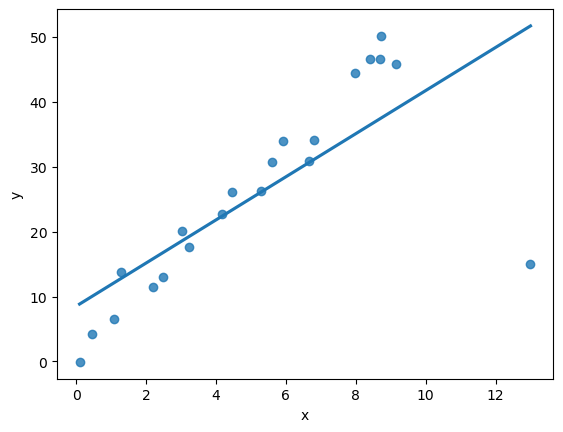

In [6]:
sns.regplot(data=data, x='x', y='y', ci=None)
plt.show()

In [7]:
influence = reg1.get_influence()
standardized_residuals = influence.resid_studentized_internal

standardized_residuals

array([-0.92989085, -0.60472415, -0.56910142,  0.10808961, -0.43835945,
       -0.38403757,  0.15461725, -0.16658026,  0.26947828,  0.04026551,
        0.02493459,  0.35508241,  0.5676406 ,  0.03018763,  0.29924649,
        0.94480807,  1.01114752,  1.27426358,  0.92446734,  0.6972019 ,
       -4.22986219])

In [8]:
reg1.fittedvalues

0      8.836530
1     10.011772
2     12.148526
3     12.751767
4     15.828389
5     16.806169
6     18.597731
7     19.246852
8     23.287875
9     22.347775
10    26.048819
11    27.070121
12    28.160774
13    30.616595
14    31.077615
15    34.994644
16    36.441844
17    37.440140
18    37.391970
19    38.929269
20    51.661922
dtype: float64

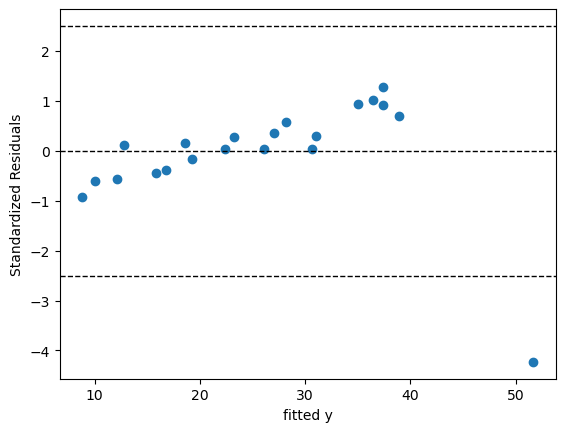

In [9]:
plt.scatter(reg1.fittedvalues, standardized_residuals)
plt.xlabel('fitted y')
plt.ylabel('Standardized Residuals')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.axhline(y=2.5, color='black', linestyle='--', linewidth=1)
plt.axhline(y=-2.5, color='black', linestyle='--', linewidth=1)
plt.show()

In [10]:
tf = abs(standardized_residuals) > 2.5
data.loc[tf, :]

,Row,x,y
20,21,13.0,15.0


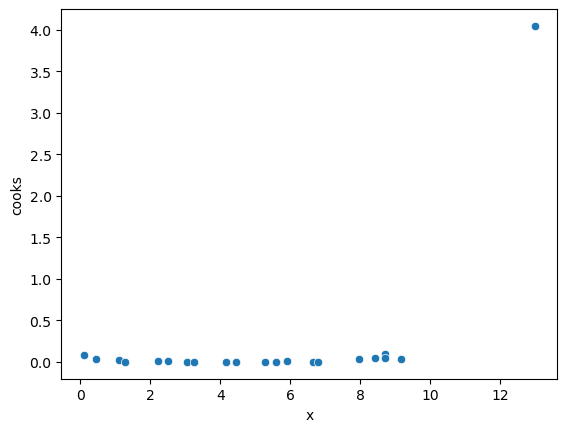

In [11]:
data['cooks'] = influence.cooks_distance[0]
sns.scatterplot(data = data, x='x', y='cooks')
plt.show()

In [12]:
newdata = data.loc[~tf, :]

In [13]:
reg2 = smf.ols(formula = 'y ~ x', data=newdata).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     652.8
Date:                Wed, 31 Jul 2024   Prob (F-statistic):           1.35e-15
Time:                        18:09:21   Log-Likelihood:                -46.374
No. Observations:                  20   AIC:                             96.75
Df Residuals:                      18   BIC:                             98.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7322      1.121      1.546      0.140      -0.622       4.086
x              5.1169      0.200     25.551      0.000       4.696       5.538
==============================================================================
Omnibus:                        0.394   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.821   Jarque-Bera (JB):                0.287
Skew:                           0.259   Prob(JB):                        0.866
Kurtosis:                       2.723   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 15장 3절

In [15]:
import pandas as pd
hsb2 = pd.read_csv('D:/Stat_Book/Data/hsb2.csv') # 실행시 경로 수정

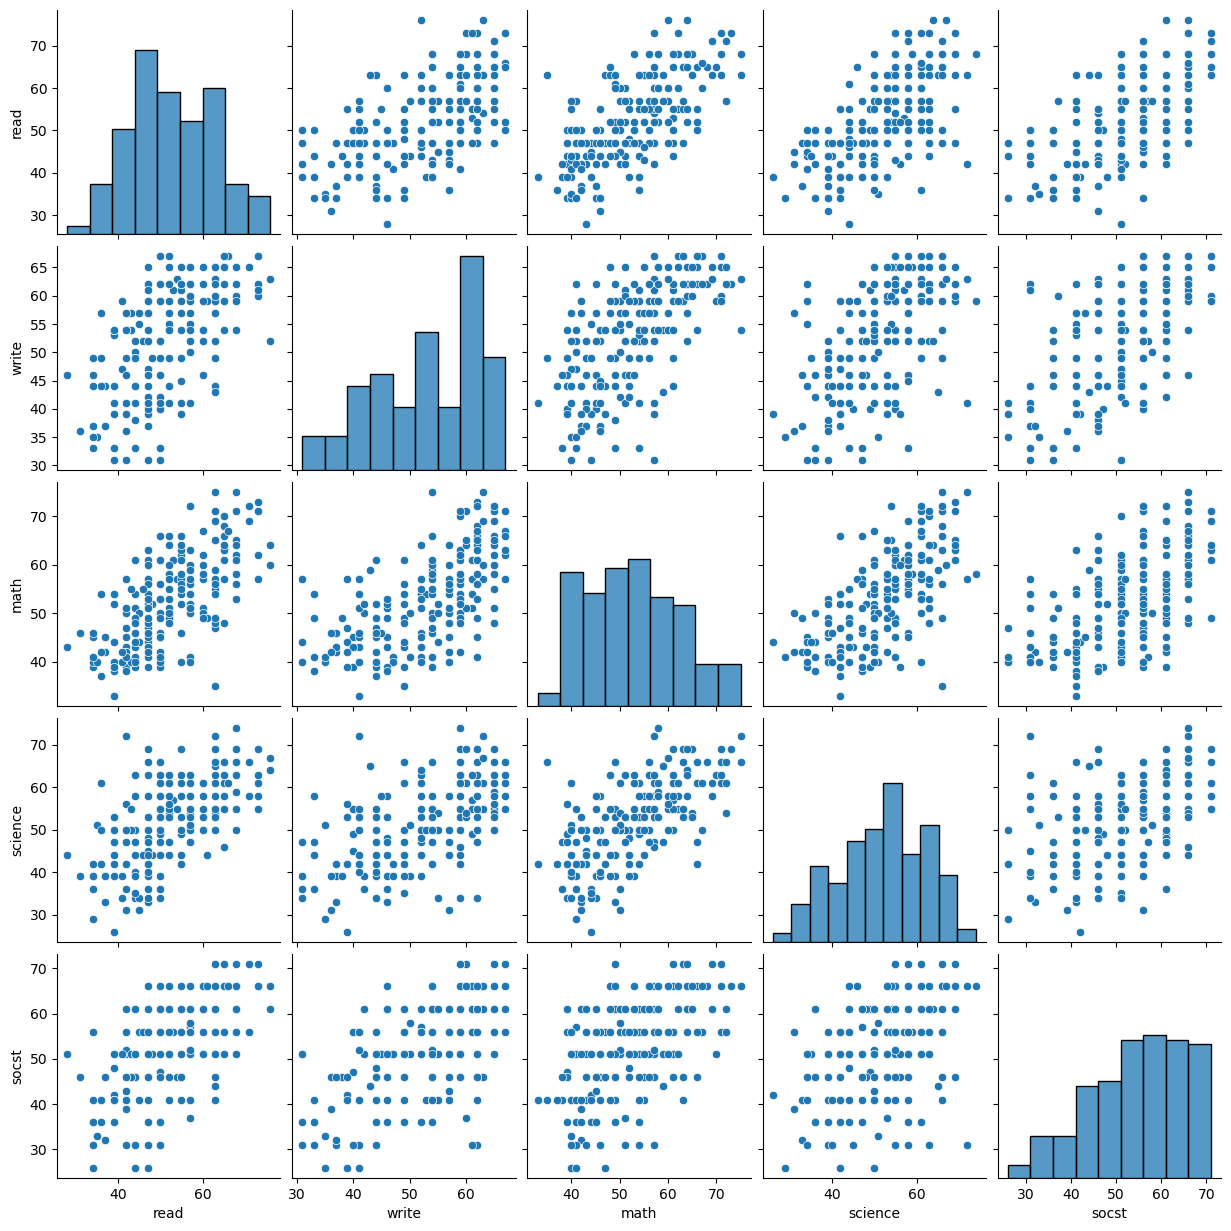

In [16]:
hsb2_score = hsb2[['read', 'write', 'math', 'science', 'socst']]
sns.pairplot(hsb2_score)
plt.show()

In [17]:
r0 = smf.ols(formula = 'science ~ math + socst + write + read + C(female) + C(race)', data=hsb2).fit()
r0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                science   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     31.18
Date:                Wed, 31 Jul 2024   Prob (F-statistic):           6.34e-31
Time:                        18:09:25   Log-Likelihood:                -658.25
No. Observations:                 200   AIC:                             1335.
Df Residuals:                     191   BIC:                             1364.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         10.5919      3.176      3.335      0.001       4.327      16.857
C(female)[T.1]    -3.2647      1.030     -3.171      0.002      -5.296      -1.234
C(race)[T.2]      -0.2014      2.537     -0.079      0.937      -5.206       4.803
C(race)[T.3]      -2.2731      2.026     -1.122      0.263      -6.269       1.723
C(race)[T.4]       3.4986      1.530      2.286      0.023       0.480       6.517
math               0.2666      0.075      3.576      0.000       0.120       0.414
socst             -0.0209      0.061     -0.341      0.733      -0.142       0.100
write              0.2895      0.077      3.753      0.000       0.137       0.442
read               0.2397      0.070      3.420      0.001       0.101       0.378
==============================================================================
Omnibus:                        0.372   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.830   Jarque-Bera (JB):                0.292
Skew:                           0.094   Prob(JB):                        0.864
Kurtosis:                       3.002   Cond. No.                         750.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
r1 = smf.ols(formula = 'science ~ math + socst + write + read + gender + race_f', data=hsb2).fit()
r1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                science   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     31.18
Date:                Wed, 31 Jul 2024   Prob (F-statistic):           6.34e-31
Time:                        18:09:25   Log-Likelihood:                -658.25
No. Observations:                 200   AIC:                             1335.
Df Residuals:                     191   BIC:                             1364.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              7.3272      3.276      2.236      0.026       0.865      13.790
gender[T.Male]         3.2647      1.030      3.171      0.002       1.234       5.296
race_f[T.Asian]       -0.2014      2.537     -0.079      0.937      -5.206       4.803
race_f[T.Hispanic]    -2.2731      2.026     -1.122      0.263      -6.269       1.723
race_f[T.White]        3.4986      1.530      2.286      0.023       0.480       6.517
math                   0.2666      0.075      3.576      0.000       0.120       0.414
socst                 -0.0209      0.061     -0.341      0.733      -0.142       0.100
write                  0.2895      0.077      3.753      0.000       0.137       0.442
read                   0.2397      0.070      3.420      0.001       0.101       0.378
==============================================================================
Omnibus:                        0.372   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.830   Jarque-Bera (JB):                0.292
Skew:                           0.094   Prob(JB):                        0.864
Kurtosis:                       3.002   Cond. No.                         774.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
f2 = smf.ols(formula = 'science ~ math + write + read + gender + race_f', data=hsb2)
r2 = f2.fit()
r2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                science   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     35.79
Date:                Wed, 31 Jul 2024   Prob (F-statistic):           1.08e-31
Time:                        18:09:25   Log-Likelihood:                -658.31
No. Observations:                 200   AIC:                             1333.
Df Residuals:                     192   BIC:                             1359.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              7.2070      3.250      2.218      0.028       0.797      13.617
gender[T.Male]         3.2601      1.027      3.174      0.002       1.234       5.286
race_f[T.Asian]       -0.1050      2.516     -0.042      0.967      -5.067       4.857
race_f[T.Hispanic]    -2.2953      2.020     -1.136      0.257      -6.280       1.690
race_f[T.White]        3.5120      1.526      2.301      0.022       0.501       6.523
math                   0.2635      0.074      3.569      0.000       0.118       0.409
write                  0.2813      0.073      3.850      0.000       0.137       0.425
read                   0.2323      0.066      3.494      0.001       0.101       0.363
==============================================================================
Omnibus:                        0.477   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.788   Jarque-Bera (JB):                0.341
Skew:                           0.099   Prob(JB):                        0.843
Kurtosis:                       3.040   Cond. No.                         667.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.DataFrame({'variable': column, 'VIF': variance_inflation_factor(f2.exog, i)} 
             for i, column in enumerate(f2.exog_names)
             if column != 'Intercept')  

influence = r2.get_influence()
standardized_residuals = influence.resid_studentized_internal

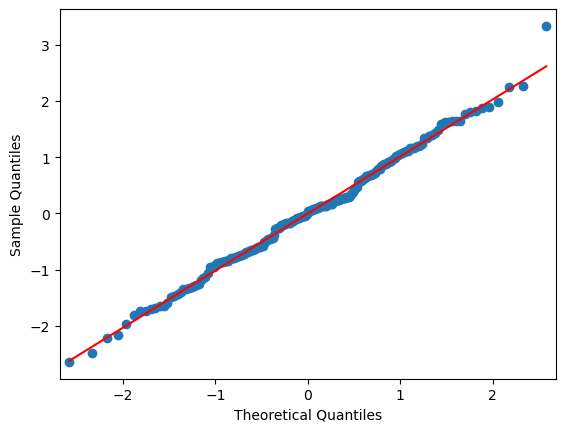

In [21]:
sm.qqplot(standardized_residuals, line='q')
plt.show()